<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Вячеслав! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

<b>👋:</b> Привет! На 2-й итерации в проекте осталось только одно замечаение: "Код должен работать независимо от того есть доступ к GPU или нет". Оно исправлено: **код стал универсальным (работает как с cuda, так и на cpu). Проверял и на коллабе, и локально на своем компе**. Без gpu, разумеется, существенно (**в разы**) дольше, поэтому очень сомневаюсь, что есть хоть какой-то смысл решать подобные задачи на cpu. **На платформе Практикума проверять смысла нет**: тех ресурсов, что в нее заложены, явно не хватает. В результате умирает ядро. Поэтому, если ты будешь запускать код, запускай локально. Иначе вся эта история вполне будет выглядеть как совершенно необоснованная придирка. А здесь все-таки речь про платные услуги и не сильно дешевые)))
</div> 

<br/>    

<font color='blue' size=3><b>Комментарий ревьюера 3</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. \
Воспроизводимость кода - это одно из главных требований к коду. Так же, условие 'Весь код выполняется без ошибок', идёт вторым пунктом в Чек листе. </font>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп» с BERT

**Цель исследования**

- для интернет-магазина «Викишоп» обучить модель классифицировать комментарии на позитивные и негативные для осуществления поиска токсичных комментариев и отправки их на модерацию.

**Описание данных:**

для проведения анализа представлен файл, содержащий комментарии пользователей интернет-магазина:

- */datasets/toxic_comments.csv*.

**Столбец text в нём содержит текст комментария, а toxic — целевой признак.**

**Заказчику важны:**

- значение метрики качества F1 должно быть не меньше 0.75.

**План работы:**

1. загрузить и подготовить данные;
2. обучить разные модели;
3. написать общий вывод.   

## Подготовка

In [1]:
# импортируем нужные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import random
import transformers
from transformers import (BertModel, AutoTokenizer, AutoModel)
from tqdm import notebook
from sklearn.linear_model import LogisticRegression
from catboost import Pool, CatBoostClassifier, cv
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (GridSearchCV, train_test_split, cross_val_score)
from sklearn.metrics import f1_score

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, сгрупированы по функциональности. Можно ещё разделить группы пустой строкой.</font>

In [2]:
# проверяем доступность cuda
torch.cuda.is_available()

True

In [3]:
# загружаем данные из файла в датафрейм и выводим основную информацию о датафрейме с помощью метода info()
data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Данные должны загружаться у тех кому ты демонстрируешь свою работу.</s></font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Данные Практикума можно загружать напрямую с базы:\
`data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')`</font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> У меня не было такой ссылки. В принципе не знал, что она есть) Но теперь знаю, исправил
</div> 

<br/>    

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Можно сделать несколько вариантов загрузки, с библиотекой os или конструкцией try: except:</font>

Как видим, в нашем датафрейме 3 столбца и 159 292 строк. Значения в столбце toxic (целевой признак) выражены целочисленным типом, значения в столбце text (т.е. сами сообщения) - строковым. В столбце Unnamed порядковые номера сообщений, они выражены целочисленным типом. Типы данных выбраны верно, здесь мы менять ничего не будем. Теперь посмотрим на распределение целевого признака, затем выведем 15 строчек нашего датафрейма на экран, а также проверим на наличие пропусков и дубликатов. 

Text(0.5, 1.0, 'Распределение целевого признака')

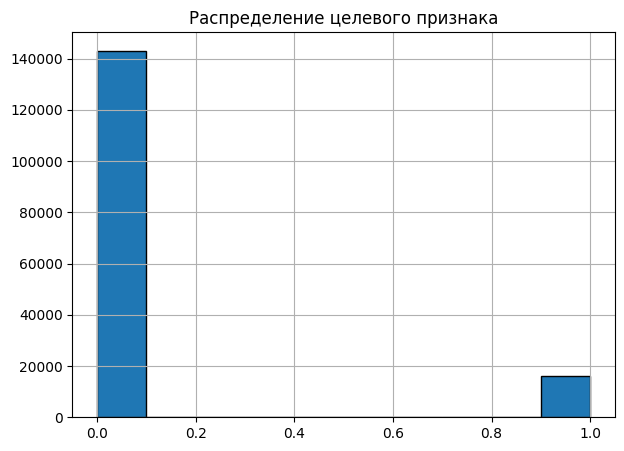

In [4]:
# построим гистограмму распределения целевого признака
data['toxic'].hist(figsize=(7, 5), ec='black')
plt.title('Распределение целевого признака')

На графике видно, что значений 1 существенно меньше, чем 0. Т.е. имеется бисбаланс классов.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Мы обнаружили серьёзный дисбаланс при исследовании данных. Как дополнительные материалы, рекомендую статью <a href='https://dyakonov.org/2021/05/27/imbalance/'>Дисбаланс классов</a>, очень классная, как и весь блог Дьяконова. Ещё такой <a href='https://github.com/Dyakonov/ml_hacks/blob/master/book_disbalance_public_v1.ipynb'>ноутбук</a> есть.</font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Спасибо за доп. материалы!
</div> 

<br/>    

In [5]:
# выведем первые 15 строк датафрейма на экран
data.head(15)

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0
8,8,Sorry if the word 'nonsense' was offensive to ...,0
9,9,alignment on this subject and which are contra...,0


В столбце text - сообщения, в столбце toxic - их отношение к позитивным или негативным (о или 1). В выведенном на экран фрагменте пропуски отсутствуют. 

In [6]:
# проверим количество пропусков в %
pd.DataFrame(round(data.isna().mean()*100,).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
Unnamed: 0,0.000000
text,0.000000
toxic,0.000000


In [7]:
# проверим на наличие явных дубликатов
data.duplicated().sum()

0

Таким образом, на этапе "Подготовка" мы загрузили данные и изучили основнуую информацию о датафрейме: в нашем датафрейме 3 столбца и 159 292 строк. Значения в столбце toxic (целевой признак) выражены целочисленным типом, значения в столбце text (т.е. сами сообщения) - строковым. В столбце Unnamed порядковые номера сообщений, они выражены целочисленным типом. Типы данных выбраны верно. Имеется имеется бисбаланс классов. Пропуски и дубликаты отсутствуют.

На следующем шаге мы используем предобученную модель BERT (нейронную сеть для создания модели языка), обучим несколько моделей и сравним значения их метрик качества F1.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Обучение

In [8]:
# задача учебная, поэтому, чтобы  не создавать эмбеддинги слишком долго, делаем выборку 2 000 случайных объектов
ind_2000 = random.sample(list(data.index), 2000)
data = data[data.index.isin(ind_2000)].reset_index(drop=True)

In [9]:
# инициализируем токенизатор как объект класса BertTokenizer() и передадим ему аргумент 
#vocab_file (файл со словарём, на котором обучалась модель)
#tokenizer = transformers.BertTokenizer(
    #vocab_file='D:/vocab.txt')

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Так же как и с данными - у меня нет файла 'D:/vocab.txt' я не могу запустить код.</s></font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Токенизатор можно то же инициировать методом `from_pretrained`</font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Замечания исправил, см. ниже
</div> 

<br/>    

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

In [10]:
tokenizer = AutoTokenizer.from_pretrained('unitary/toxic-bert')

In [11]:
# преобразуем текст в номера токенов из словаря методом encode()
# применим метод padding, чтобы после токенизации длины исходных текстов в корпусе были равными
# создаем маску для выделения важных токенов
tokenized = data['text'].apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что подрезаешь вектор в Токенизаторе.</font>

In [12]:
# инициализируем модель класса BertModel()
model = AutoModel.from_pretrained('unitary/toxic-bert')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Для этой задачи существуют специальные модели, например 'unitary/toxic-bert'</font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Взял для работы 'unitary/toxic-bert'
</div> 

<br/>    

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Отличный выбор модели! Есть мнение, что она обучалась на этих данных.</font>

In [13]:
# выводим информацию о типе используемого пользователем процессора
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Используемый тип процессора:', device)

Используемый тип процессора: cuda


In [14]:
model.to(device)
batch_size = 100
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)])
        
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])

        with torch.no_grad():
             batch_embeddings = model(batch.to(device), attention_mask=attention_mask_batch.to(device))

        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy())

  0%|          | 0/20 [00:00<?, ?it/s]

In [15]:
#device = torch.device('cuda')
#cuda = torch.device('cuda')
#model.to(device)
#batch_size = 100
#embeddings = []
#for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        #batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)])
        #attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])

        #with torch.no_grad():
             #batch_embeddings = model(batch.cuda(), attention_mask=attention_mask_batch.cuda())

        #embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy())

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> <s>Код должен работать независимо от того есть доступ к GPU или нет.</s></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'><s> Ошибка исполнения кода. </s></font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

<b>👋:</b> Исправил, см. выше. Теперь все работает вне зависимости от того, пользуется ревьюер GPU или нет)) Предыдущий код закомментировал
</div> 

<br/>    

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'> Отлично!</font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Здесь не вижу проблемы. Код будет работать и без GPU, достаточно просто убрать .cuda() в строке batch_embeddings =... и две первые строчки в ячейке (там, где 'cuda'). Если с GPU быстрее, какие есть разумные причины этим не пользоваться?))
</div> 

<br/>    

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)</font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Можно, но доступность cuda я проверил вначале - во 2-й ячейке
</div> 

<br/>    

In [16]:
# собираем все эмбеддинги в матрицу признаков
features = np.concatenate(embeddings)

In [17]:
# извлекаем признаки
X = features
y = data['toxic']

In [18]:
# разделяем модель на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=12345)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(1000, 768)

(1000, 768)

(1000,)

(1000,)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Здорово , что у нас есть выборка для тестов!</font>

In [19]:
# пробовал как альтернативный способ устранения дисбаланса, разницы не увидел, поэтому использовал class_weight='balanced'

#from imblearn.over_sampling import SMOTE
#oversample = SMOTE(random_state=12345)
#X_train, y_train = oversample.fit_resample(X_train, y_train)

**Рассмотрим Логистическую регрессию**

In [20]:
%%time
lin = GridSearchCV(estimator=LogisticRegression(random_state=12345, class_weight='balanced', max_iter=500), param_grid={
    }, scoring = 'f1', cv=5)

lin.fit(X_train, y_train)

print('Оптимальные значения параметров:', lin.best_params_)
print('Значение метрики F1:', lin.best_score_)

Оптимальные значения параметров: {}
Значение метрики F1: 0.9385147168073997
CPU times: total: 0 ns
Wall time: 589 ms


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово что оценка кроссвалидацией.</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'><s> Метрика `f1_score(average='weighted')` применяется к мультиклассовой классификации и в нашем случае нужно `average='binary'`\
    Взвешенная метрика не улучшает модель, а даёт смещённую оценку.</s></font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Это исправил. Согласно https://scikit-learn.org/stable/modules/model_evaluation.html для бинарной классификации (for binary targets), используется просто 'f1'. А "average='binary'" я использовал ниже, для предсказаний на тестовой выборке. И это решило мою проблему. Спасибо за комментарий!)
</div> 

<br/>    

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>`average='binary` это дефолтный параметр у 'f1'.</font>

**Рассмотрим Случайный лес**

In [21]:
%%time
forest = GridSearchCV(estimator=RandomForestClassifier(random_state=12345, class_weight='balanced'), param_grid={
    'n_estimators': range(10, 110, 10),
    'max_depth': range(2, 15, 1)}, scoring = 'f1', cv=3)
forest.fit(X_train, y_train)

print('Оптимальные значения параметров:', forest.best_params_)
print('Значение метрики F1:', forest.best_score_)

Оптимальные значения параметров: {'max_depth': 3, 'n_estimators': 70}
Значение метрики F1: 0.9438405797101449
CPU times: total: 3min 3s
Wall time: 3min 6s


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

**Рассмотрим CatBoost**

In [22]:
%%time
cbr = GridSearchCV(estimator=CatBoostClassifier(silent=True, random_state=12345), param_grid={
    'iterations': range(20, 60, 10),'depth': range(5, 10, 2)}, scoring = 'f1', cv=3)
cbr.fit(X_train, y_train)

print('Оптимальные значения параметров:', cbr.best_params_)
print('Значение метрики F1:', cbr.best_score_)

Оптимальные значения параметров: {'depth': 5, 'iterations': 20}
Значение метрики F1: 0.9529883638043031
CPU times: total: 38min 31s
Wall time: 4min 14s


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>CatBoost может сам векторизовать текст. Для этого указываем в класс модели текстовые данные. `text_features=["text_lemm"]`</font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В этом случае ведь мы работаем с BERT, с помощью которого извлекаем эмбеддинги, на которых уже обучаем модели...
</div> 

<br/>    

**Рассмотрим LightGBM**

In [23]:
%%time
gbm = GridSearchCV(estimator=LGBMClassifier(random_state=12345, verbose= -100, class_weight='balanced'), param_grid={
    'n_estimators': range(90, 110, 10),
    'num_leaves': range(20, 40, 10)}, scoring = 'f1', cv=2)
gbm.fit(X_train, y_train)

print('Оптимальные значения параметров:', gbm.best_params_)
print('Значение метрики F1:', gbm.best_score_)

Оптимальные значения параметров: {'n_estimators': 90, 'num_leaves': 20}
Значение метрики F1: 0.9254455445544554
CPU times: total: 40.1 s
Wall time: 8.16 s


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

**По итогам проверки мы определили лучшую модель - CatBoost, имеющую F1 = 0.9529883638043031.** При этом стоит отметить, что все наши модели удовлетворяют требованиям заказчика - значение метрики качества F1 должно быть не меньше 0.75.

Теперь мы проверим наши модели на тестовой выборке.

In [24]:
pred_lin = lin.best_estimator_.predict(X_test)
print('Значение метрики F1:', f1_score(y_test, pred_lin, average='binary'))

Значение метрики F1: 0.9411764705882353


In [25]:
pred_forest = forest.best_estimator_.predict(X_test)
print('Значение метрики F1:', f1_score(y_test, pred_forest, average='binary'))

Значение метрики F1: 0.9326923076923077


In [26]:
pred_cbr = cbr.best_estimator_.predict(X_test)
print('Значение метрики F1:', f1_score(y_test, pred_cbr, average='binary'))

Значение метрики F1: 0.9137055837563451


In [27]:
pred_gbm = gbm.best_estimator_.predict(X_test)
print('Значение метрики F1:', f1_score(y_test, pred_gbm, average='binary'))

Значение метрики F1: 0.9447236180904524


Значение метрики F1 нашей лучшей модели составило менее, чем 0.75.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> К сожалению, ни одна из моделей не показала результат выше 0.75 F1-меры на тестовых данных.</s></font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Теперь это исправлено) Сменил модель на 'unitary/toxic-bert' и f1_score(average='weighted') на average='binary'. И это решило дело
</div> 

<br/>    

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

Как видим, по **итогам проверки на тестовой выборке все наши модели удовлетворяют требованиям проекта**. При этом лучший показатель метрики качества F1 у LightGBM: 0.9447236180904524 (у CatBoost: 0.9137055837563451). Таким образом, цель проекта достигнута: нужная модель нами получена.

## Вывод

CatBoostЦелью нашего проекта было обучить модель для интернет-магазина «Викишоп» классифицировать комментарии на позитивные и негативные для осуществления поиска токсичных комментариев и отправки их на модерацию.

Для проведения анализа представлен файл, содержащий комментарии пользователей интернет-магазина:

- */datasets/toxic_comments.csv*.

**Столбец text в нём содержит текст комментария, а toxic — целевой признак.**

**Заказчику важны:**

- значение метрики качества F1 должно быть не меньше 0.75.

На этапе "Подготовка" мы провели следующую работу: загрузили данные и изучили основнуую информацию о датафрейме: в нашем датафрейме 3 столбца и 159 292 строк. Значения в столбце toxic (целевой признак) выражены целочисленным типом, значения в столбце text (т.е. сами сообщения) - строковым. В столбце Unnamed порядковые номера сообщений, они выражены целочисленным типом. Типы данных выбраны верно. Имеется имеется бисбаланс классов. Пропуски и дубликаты отсутствуют.

Затем мы мспользовали предобученную модель BERT, обучили несколько моделей (Логистическую регрессию, Случайный лес, CatBoost и LightGBM) и сравнили значения их метрик качества F1. При проверке на обучающей выборке лучшее значение метрики F1 показала модель CatBoost (0.9529883638043031), что соответствует установленному в условиях проекта критерию (не меньше 0.75). По итогам проверки на **тестовой** выборке лучший показатель метрики качества F1 у LightGBM: 0.9447236180904524 (у CatBoost: 0.9137055837563451). 

**Таким образом, цель проекта достигнута: получена модель, соответствующая требованиям заказчика.**

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Вячеслав, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Добейся воспроизводимости кода.</font></ul>
<ul><font color='red'>Не применяй взвешенную метрику, она не улучшает модель.</font></ul>
<ul><font color='red'>Построй модель со значением метрики качества F1 не меньше 0.75 на тестовых данных.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Замечания исправил. Проект можно принимать)
</div> 

<br/>    

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Вячеслав, большое спасибо за доработку. Загрузили данные и модели, модели оцениваюся корректно.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Добейся воспроизводимости кода.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

<b>👋:</b> Добился
</div> 

<br/>    

<font color='blue'><b>Итоговый комментарий ревьюера 3</b></font>\
<font color='green'> Вячеслав, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html

Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .

NLP от Samsung https://stepik.org/course/54098/promo \
NLP от Huawei https://ods.ai/tracks/nlp-course-spring-23 \
Transformers от Hugging Face https://huggingface.co/learn/nlp-course/chapter1/1
</font>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны